In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10## дюймы

Загрузим таблицу с ИПЦ

In [3]:
cpi = pd.read_csv('russia.index.cpi (statbureau.org).csv')

In [108]:
new_cpi = cpi[-5:].reset_index(drop= True).copy()
new_cpi.head()

,Год,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
0,2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36
1,2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83
2,2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82
3,2022,100.99,101.17,107.61,101.56,100.12,99.65,99.61,99.48,100.05,100.18,100.37,100.78
4,2023,100.84,100.46,100.37,100.38,100.31,100.37,100.63,100.28,100.87,100.83,NaN,NaN


Таблицу надо перевернуть, чтобы годы и месяцы были в строках. Иначе будет сложно построить график. Конечно, нужно было воспользоваться встроенными функцимия типа slack(). Но так как кремени на итоговое задание дано крайне мало и его не хватило, чтобы найти изящное pandas решение, а таблицы не очень большие, то ноколхозим цикл. 

In [142]:
new_cpi = cpi[-5:].reset_index(drop = True).copy()
new_cpi.columns = range(0, 13)
#cpi.loc[0][1] # первая [] - номер строки, вторая [] - номер столбца не считая индекс
#new_cpi.stack()
row_in_loop = 0
cpi_in_column = pd.DataFrame(columns = ['year_', 'month_', 'cpi_value'], index=range(1, new_cpi.size))
for row_ in range(1,len(new_cpi)+1):
    for column_ in range(1, len(new_cpi.columns)):
          row_in_loop +=1
          
          cpi_in_column.loc[row_in_loop]['year_'] = 2018 + row_
          cpi_in_column.loc[row_in_loop]['month_'] = column_
          cpi_in_column.loc[row_in_loop]['cpi_value'] = new_cpi.loc[row_-1][column_]
          

Вроде сработало

In [199]:
cpi_in_column.head(10)

,year_,month_,cpi_value,date
1,2019,1,101.01,2019-01-01
2,2019,2,100.44,2019-02-01
3,2019,3,100.32,2019-03-01
4,2019,4,100.29,2019-04-01
5,2019,5,100.34,2019-05-01
6,2019,6,100.04,2019-06-01
7,2019,7,100.2,2019-07-01
8,2019,8,99.76,2019-08-01
9,2019,9,99.84,2019-09-01
10,2019,10,100.13,2019-10-01


Загрузим таблицу с курсом доллара

In [221]:
usd_rub = pd.read_excel('RC_F30_11_2018_T02_12_2023.xlsx')

In [222]:
usd_rub.sort_values(by = 'data', ascending=True).head()

,nominal,data,curs,cdx
1233,1,2018-11-30,66.6342,Доллар США
1232,1,2018-12-01,66.5335,Доллар США
1231,1,2018-12-04,66.2921,Доллар США
1230,1,2018-12-05,66.4467,Доллар США
1229,1,2018-12-06,66.8242,Доллар США


Сгрупируем по месяцам и отсортируем по возрастанию даты

In [223]:
usd_rub['month_'] = usd_rub['data'].dt.month
usd_rub['year_'] = usd_rub['data'].dt.year
new_usd_rub =usd_rub.groupby(["month_", "year_"])["curs"].mean().reset_index()
new_usd_rub.sort_values(by = ['year_', 'month_'], ascending=True, inplace= True)

Пстроим графики: курса доллара (зелёный) и ИПЦ (красный). Видно, что пики и спады совпадают (может с небольшим лагом). Ноужно было бы построить модель линейной регрессии ИПЦ к измененению курса доллара. Но времени на выполнение итогово задания мало, а нужно было ещё разобраться, как работать со временем и переворачивать таблички

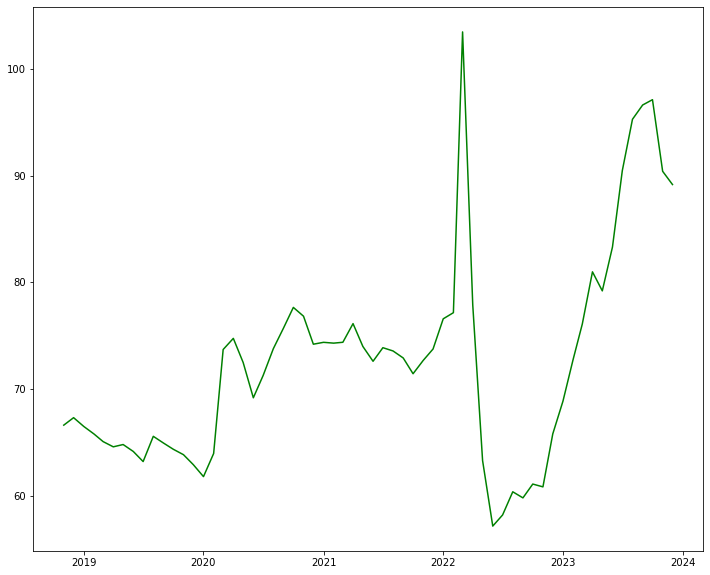

In [230]:
new_usd_rub['date'] = new_usd_rub['month_'].map(str)+ '-' +new_usd_rub['year_'].map(str)
new_usd_rub['date'] = pd.to_datetime(new_usd_rub['date'], format='%m-%Y')
plt.plot_date(new_usd_rub['date'], new_usd_rub['curs'], fmt='-g')

plt.show()

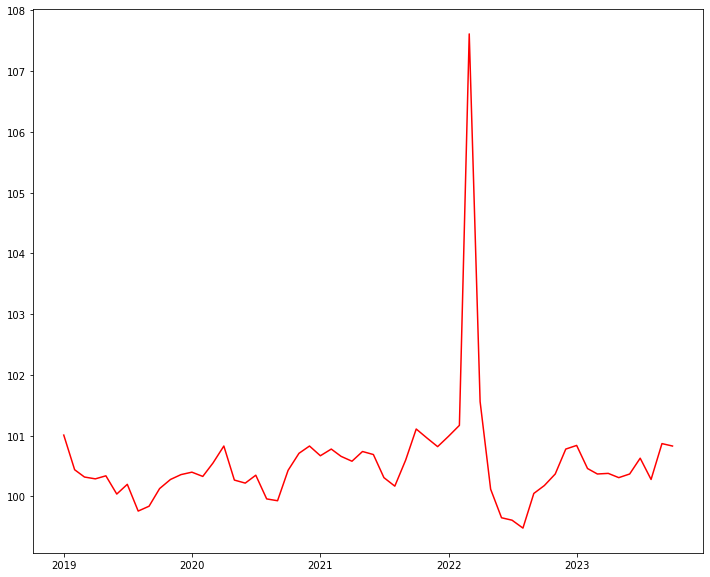

In [225]:
cpi_in_column.dropna(inplace=True, how='any')
cpi_in_column['date'] = cpi_in_column['month_'].map(str)+ '-' +cpi_in_column['year_'].map(str)
cpi_in_column['date'] = pd.to_datetime(cpi_in_column['date'], format='%m-%Y')
fig, ax = plt.subplots()
plt.plot_date(cpi_in_column['date'], cpi_in_column['cpi_value'], fmt='-r')
plt.show()